# Fake News Detection - Using Text File

## Import Pandas and Numpy for Data Processing

In [14]:
import pandas as pd
import numpy as np

In [15]:
dfBase = pd.read_csv(r'C:\Users\riyas.rafi\Desktop\Python\ML Project\Fake News\news.csv')
dfBase.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Checking the Null Value in the dataset

In [18]:
dfBase.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [19]:
len(dfBase)

6335

In [21]:
dfBase["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

## Balancing the Data

In [22]:
Real = dfBase[dfBase["label"]=="REAL"]
Real.head()

,Unnamed: 0,title,text,label
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [24]:
Fake = dfBase[dfBase["label"]=="FAKE"]
Fake.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE


# Merging the Fake data into with Real data

In [25]:
Real.shape, Fake.shape

((3171, 4), (3164, 4))

In [26]:
Real = Real.sample(Fake.shape[0])

In [27]:
Real.shape, Fake.shape

((3164, 4), (3164, 4))

In [28]:
dfBase = Real.append(Fake, ignore_index = True)
dfBase.tail()

,Unnamed: 0,title,text,label
6323,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6324,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6325,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6326,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6327,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE


# Plotting & Data Analysis

In [29]:
dfBase = dfBase.rename(columns={'Unnamed: 0': 'length'})
dfBase.tail()

,length,title,text,label
6323,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6324,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6325,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6326,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6327,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE


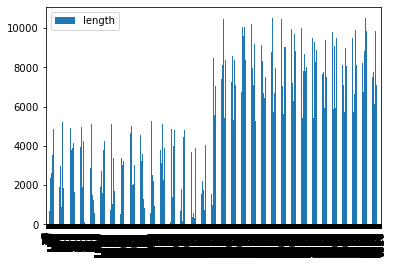

In [33]:
dfBase.plot.bar(stacked=True);

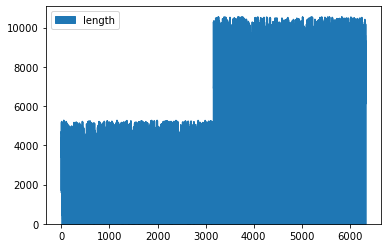

In [34]:
dfBase.plot.area();

# Import Sklearn for Model Creation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
X_train, X_test, y_train, y_test = train_test_split(dfBase["text"], dfBase["label"], test_size = 0.3, random_state = 0, shuffle = True, stratify = dfBase["label"])

# Bag of words Creation

In [42]:
vectorizer = TfidfVectorizer()

In [43]:
X_train = vectorizer.fit_transform(X_train)

In [44]:
X_train.shape

(4429, 58227)

In [45]:
X_train

<4429x58227 sparse matrix of type '<class 'numpy.float64'>'
	with 1501284 stored elements in Compressed Sparse Row format>

# Call the Pipeline and Random Forest Classifier

In [46]:
clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", RandomForestClassifier(n_estimators = 100, n_jobs = -1))])

In [54]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

# Checking the "Y" Predict Value & Confusion matrix for accuracy

In [55]:
y_pred = clf.predict(X_test)

In [56]:
confusion_matrix(y_test, y_pred)

array([[838, 112],
       [103, 846]], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.89      0.88      0.89       950
        REAL       0.88      0.89      0.89       949

    accuracy                           0.89      1899
   macro avg       0.89      0.89      0.89      1899
weighted avg       0.89      0.89      0.89      1899



In [58]:
accuracy_score(y_test, y_pred)

0.8867825171142707

# Input and check the prediction of user defined text 

In [66]:
clf.predict(["Hi i am offering a free ticket to Berlin for this summer"])

array(['FAKE'], dtype=object)

In [67]:
clf.predict(["Hi how are you"])

array(['FAKE'], dtype=object)

# Importing the SVM Classifier 

In [79]:
clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", SVC(C = 1000, gamma = 'auto'))])

In [80]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [81]:
y_pred = clf.predict(X_test)

In [82]:
confusion_matrix(y_test, y_pred)

array([[846, 104],
       [250, 699]], dtype=int64)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.77      0.89      0.83       950
        REAL       0.87      0.74      0.80       949

    accuracy                           0.81      1899
   macro avg       0.82      0.81      0.81      1899
weighted avg       0.82      0.81      0.81      1899



In [84]:
accuracy_score(y_test, y_pred)

0.8135860979462876

# input and check the prediction of user defined text

In [85]:
clf.predict(["Hi i am offering a free ticket to Berlin for this summer"])

array(['FAKE'], dtype=object)

In [87]:
clf.predict(["Hi i am a data scientist"])

array(['FAKE'], dtype=object)